Supply Chain Emissions Modeling Using Industry and Commodity Data (2010–2016)

Problem Statement:
We have annual supply chain emission data from 2010–2016 categorized into industries and commodities. The goal is to develop a regression model that can predict the Supply Chain Emission Factors with Margins based on descriptive and quality metrics (substance, unit, reliability, temporal/geographical/technological/data collection correlations, etc.).

🌱Greenhouse Gas Emission Prediction Project 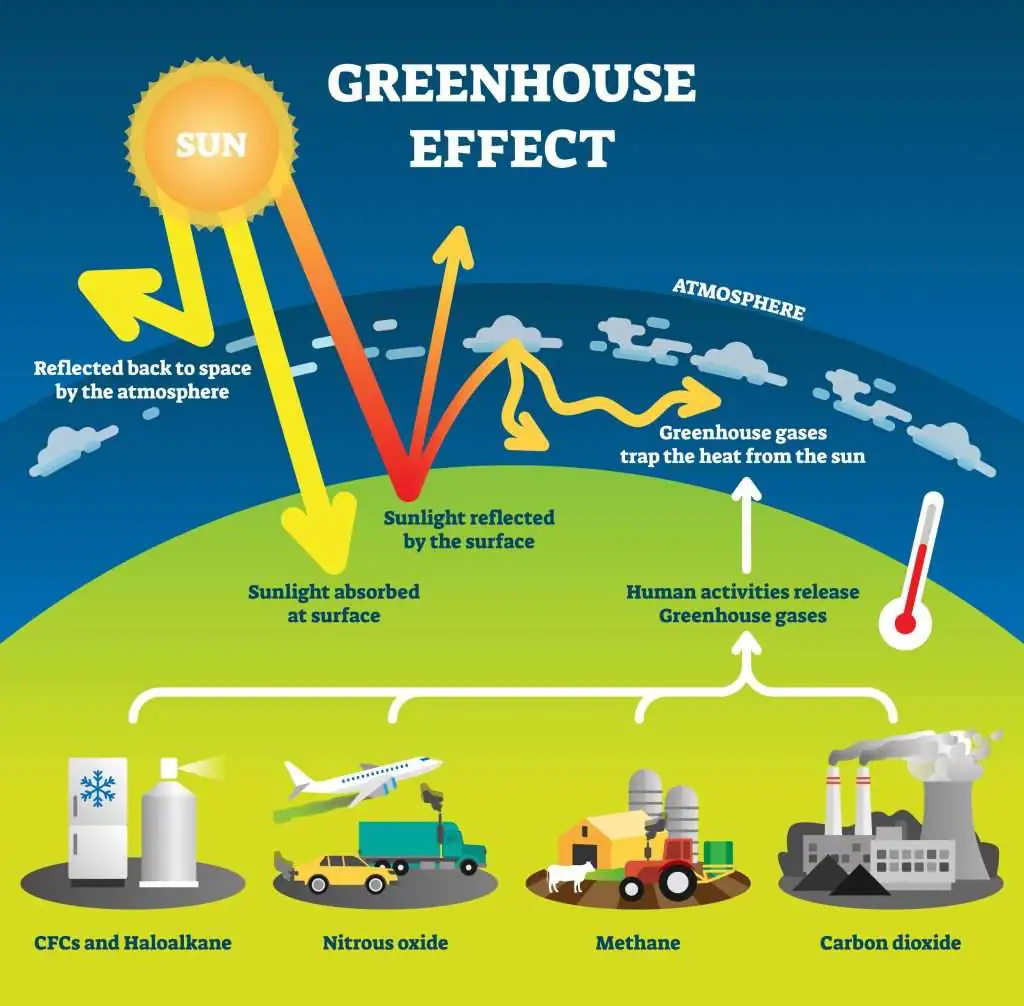

Project Goal:
To analyze and predict greenhouse gas (GHG) emissions from various U.S. industries and commodities using the official dataset from data.gov.

**Source:**
https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-for-us-industries-and-commodities

**WEEK-1**

**Step 1:** Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np

**Step 2:** Load Dataset

In [ ]:
GHG = pd.read_excel("datasets.xlsx")
years = range(2010,2017)
GHG

,Name,Supply Chain GHG Emission Factors for US Commodities and Industries
0,Authors,"Wesley Ingwersen, Mo Li"
1,Description,Tables presenting supply chain and margin emis...
2,DOI,http://doi.org/10.23719/1517769


In [ ]:
years[2] #checking the third year in the range

2012

In [ ]:
GHG = pd.read_excel("datasets.xlxs", sheet_name='2010_Detail_Commodity') #reading a specific sheet
GHG.head() #displaying the first 5 rows of the dataframe

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [ ]:
GHG_2= pd.read_excel("datasets.xlsx", sheet_name=f'{years[0]}_Detail_Industry') # reading a specific sheet for the year 2010(0)
GHG_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [ ]:
GHG_2.tail()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
1575,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.006,0.0,0.006,NaN,4,3,1,5,1
1576,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.0,0.000,NaN,4,3,1,5,1
1577,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.0,0.000,NaN,4,3,1,5,1
1578,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.0,0.000,NaN,4,3,1,5,1
1579,814000,Private households,other GHGs,"kg CO2e/2018 USD, purchaser price",0.000,0.0,0.000,NaN,4,3,1,5,1


In [ ]:
GHG_2.shape

(1580, 13)

In [ ]:
print(GHG.columns.tolist())

['Commodity Code', 'Commodity Name', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Supply Chain Emission Factors with Margins', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']


In [ ]:
# Step 3: Process Data for All Years

all_data = []

for year in years: # Loop through each year in the range
    try:
        GHG_com = pd.read_excel('datasets.xlsx', sheet_name=f'{year}_Detail_Commodity')
        GHG_ind = pd.read_excel('datasets.xlsx', sheet_name=f'{year}_Detail_Industry')

        GHG_com['Source'] = 'Commodity'
        GHG_ind['Source'] = 'Industry'
        GHG_com['Year'] = GHG_ind['Year'] = year


        GHG_com.columns = GHG_com.columns.str.strip()
        GHG_ind.columns = GHG_ind.columns.str.strip()

        GHG_com.rename(columns={ # Renaming columns for clarity
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        GHG_ind.rename(columns={  # Renaming columns for clarity
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([GHG_com, GHG_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [ ]:
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [ ]:
len(all_data)

7

In [ ]:
GHG= pd.concat(all_data, ignore_index=True)
GHG.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [ ]:
len(GHG)

22092


**Step 3:** Data Preprocessing

In [ ]:
GHG.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
GHG.isnull().sum() # Checking for missing values in the concatenated DataFrame

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


**WEEK-2**

In [ ]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
GHG.drop(columns=['Unnamed: 7'],inplace=True)

In [ ]:
GHG.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [ ]:
print(GHG.info()) # Displaying the information about the DataFrame including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [ ]:
GHG.describe().T # Displaying the summary statistics of the DataFrame

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [ ]:
GHG.isnull().sum() # Checking for missing values in the concatenated DataFrame

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0
DQ GeographicalCorrelation of Factors without Margins,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

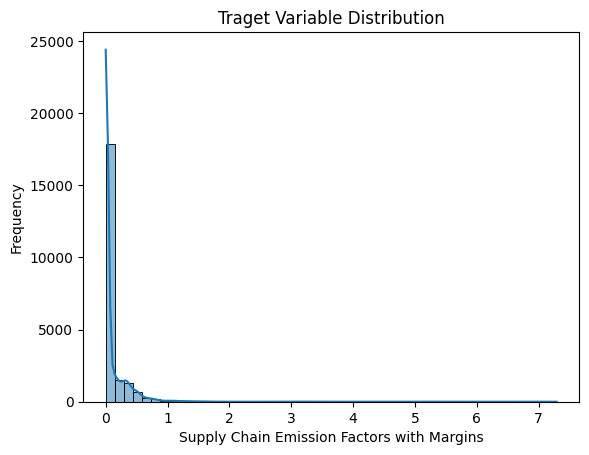

In [ ]:
sns.histplot(GHG['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Traget Variable Distribution')
plt.xlabel('Supply Chain Emission Factors with Margins')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Check Categorical variables
print(GHG["Substance"].value_counts()) # Displaying the counts of unique values in the 'Substance' column

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [ ]:
print(GHG['Unit'].value_counts()) # Displaying the counts of unique values in the 'Unit' column

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [ ]:
print(GHG['Unit'].unique()) # Displaying the unique values in the 'Unit' column

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [ ]:
GHG['Substance'].unique() # Displaying the unique values in the 'Substance' column

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [ ]:
Substance_map = {'carbon dioxide':0, # Mapping the 'Substance' column to numerical values
                'methane':1,
                'nitrous oxide':2,
                'other greenhouse gases':3}

In [ ]:
GHG['Substance'] = GHG['Substance'].map(Substance_map) # Applying the mapping to the 'Substance' column

In [ ]:
GHG['Substance'].unique() # Displaying the unique values in the 'Substance' column

array([ 0.,  1.,  2., nan])

In [ ]:
print(GHG['Unit'].unique()) # Checking unique values in 'Unit' column

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [ ]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1} # Mapping units to integers

In [ ]:
GHG['Unit']=GHG['Unit'].map(unit_map) # Applying the mapping to the 'Unit' column


In [ ]:
print(GHG['Unit'].unique()) # Checking unique values in 'Unit'
print(GHG['Source'].unique()) # Checking unique values in 'Source' column


[0 1]
['Commodity' 'Industry']


In [ ]:
source_map = {'Commodity': 0, 'Industry': 1} # Mapping 'Source' column to integers
GHG['Source'] = GHG['Source'].map(source_map) # Applying the mapping to the 'Source' column
GHG['Source'].unique() # Displaying the unique values in the 'Source' column

array([0, 1])

In [ ]:
GHG.info() # Displaying the information about the DataFrame including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               16569 non-null  float64
 3   Unit                                                    22092 non-null  int64  
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [ ]:
GHG.Code.unique() # Displaying the unique values in the 'Code' column

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [ ]:
GHG.Name.unique() # Displaying the unique values in the 'Name' column

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [ ]:
len(GHG.Name.unique()) # Displaying the total number of unique values in the 'Name' column

713

**Top 10 Emmiting Induatry**

In [ ]:
Top_10_Emittors=GHG[['Name','Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values('Supply Chain Emission Factors with Margins', ascending=False).head(10) # Selecting top 10 emitting industries
Top_10_Emittors=Top_10_Emittors.reset_index() # Resetting the index of the DataFrame

In [ ]:
Top_10_Emittors

,Name,Supply Chain Emission Factors with Margins
0,Cement manufacturing,1.686179
1,Cement,1.324964
2,"Electric power generation, transmission, and d...",1.220357
3,Electricity,1.016143
4,"Dolls, toys, and games",0.832179
5,Lime and gypsum products,0.816536
6,Lime and gypsum product manufacturing,0.799679
7,Industrial gas manufacturing,0.612929
8,Compressed Gases,0.539679
9,Clothing,0.468714


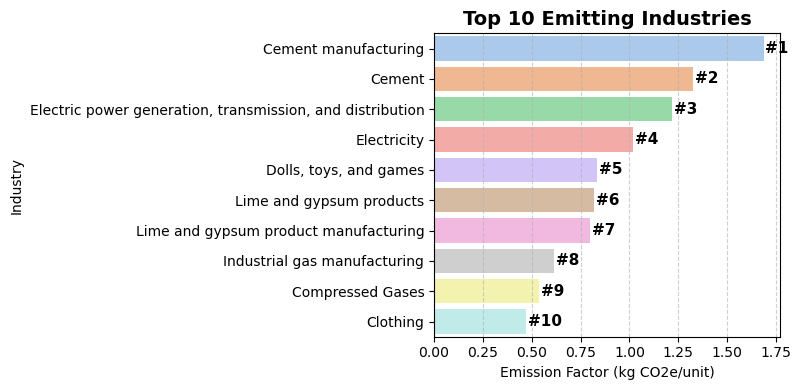

In [ ]:

# Plotting the top 10 emitting industries
plt.figure(figsize=(8,4))
# Example: Top emitting industries (already grouped)
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=Top_10_Emittors,
    hue='Name',
    palette='pastel'  # Use 'Blues', 'viridis', etc., for other color maps
)

# Add ranking labels (1, 2, 3...) next to bars
for i, (value, name) in enumerate(zip(Top_10_Emittors['Supply Chain Emission Factors with Margins'], Top_10_Emittors.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') # Title of the plot
plt.xlabel('Emission Factor (kg CO2e/unit)') # X-axis label
plt.ylabel('Industry') # Y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adding grid lines for better readability
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

In [ ]:
GHG.drop(columns=['Name','Code','Year'], inplace=True) # Dropping unnecessary  non-numeric columns from the DataFrame like 'Name', 'Code', and 'Year' as they are not needed for further analysis

In [ ]:
GHG.head(1) # Displaying the first 5 rows of the DataFrame after dropping unnecessary columns

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0.0,0,0.398,0.073,0.47,4,3,1,4,1,0


In [ ]:
GHG.shape

(22092, 11)

In [ ]:
#Define the target variable and features
X = GHG.drop(columns=['Supply Chain Emission Factors with Margins'])
y = GHG['Supply Chain Emission Factors with Margins']  # Target variable
print(X.shape)  # Displaying the shape of the features DataFrame
print(y.shape)  # Displaying the shape of the target variable Series

(22092, 13)
(22092,)


In [ ]:
X.head()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0.0,0,0.398,0.073,4,3,1,4,1,0
1,1.0,0,0.001,0.001,4,3,1,1,1,0
2,2.0,0,0.002,0.000,4,3,1,4,1,0
3,NaN,1,0.002,0.000,3,3,1,3,1,0
4,0.0,0,0.659,0.081,4,3,1,4,1,0


In [ ]:
y.head()

0    0.470
1    0.002
2    0.002
3    0.002
4    0.740
Name: Supply Chain Emission Factors with Margins, dtype: float64

**Univariate Analysis**

C:\Users\gupta\AppData\Local\Temp\ipykernel_18680\688925783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=GHG, x='Substance', palette='viridis')


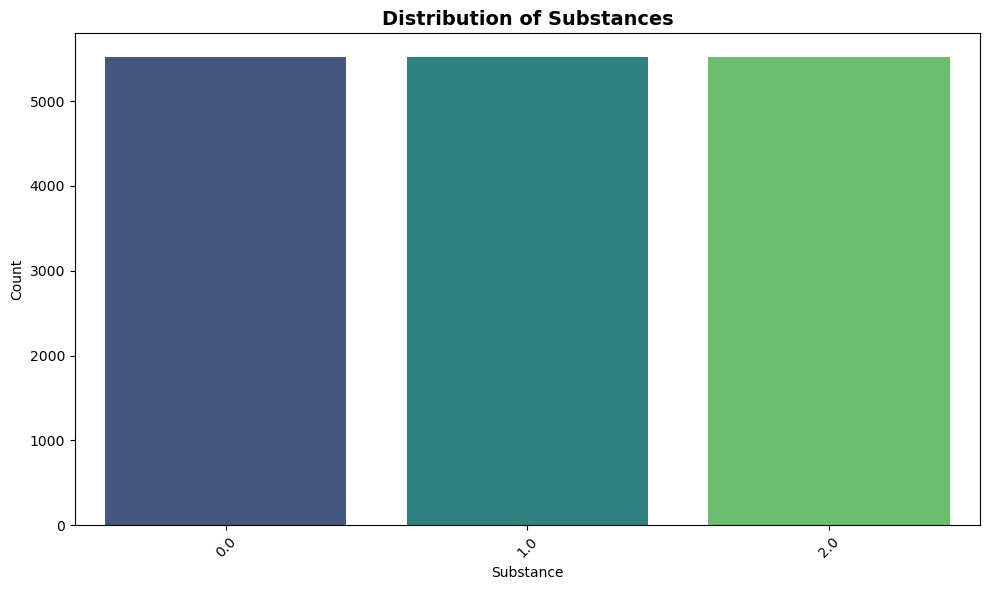

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=GHG, x='Substance', palette='viridis')
plt.title('Distribution of Substances', fontsize=14, fontweight='bold')
plt.xlabel('Substance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\gupta\AppData\Local\Temp\ipykernel_18680\2518827032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=GHG, x='Unit', palette='viridis')


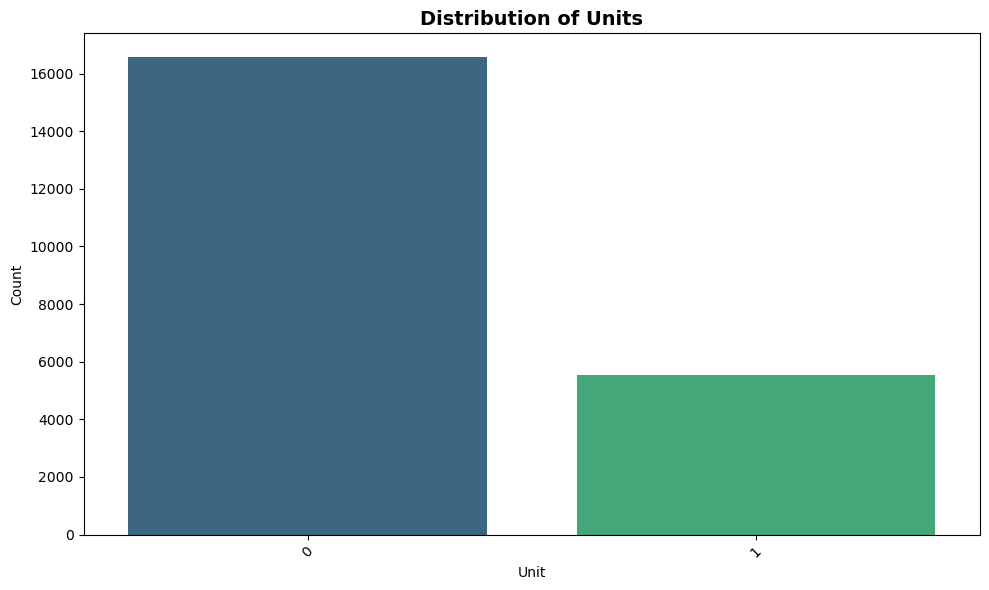

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=GHG, x='Unit', palette='viridis')
plt.title('Distribution of Units', fontsize=14, fontweight='bold')
plt.xlabel('Unit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\gupta\AppData\Local\Temp\ipykernel_18680\2858294310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=GHG, x='Source', palette='viridis')


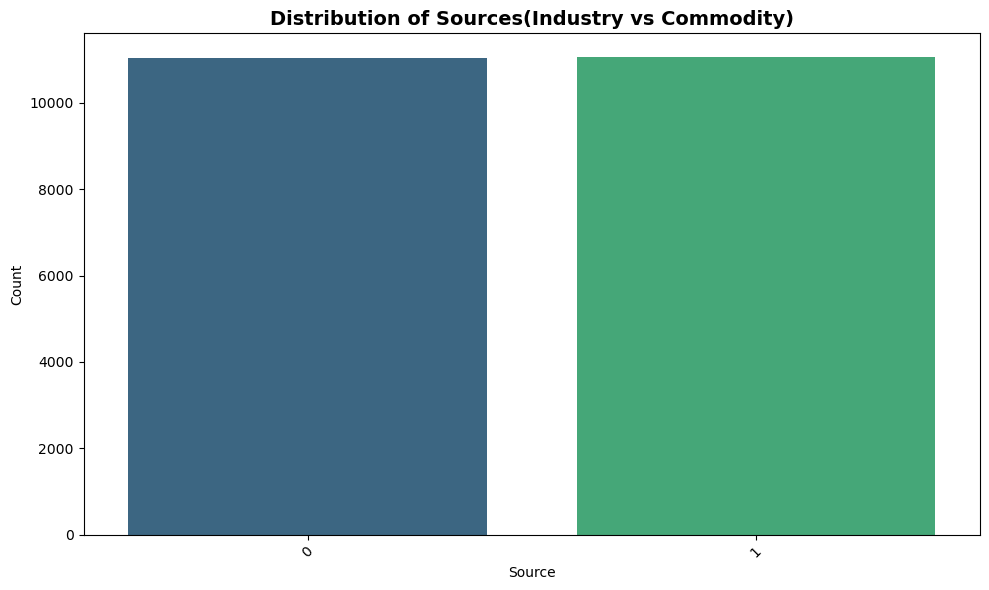

In [ ]:
#count plot for source
plt.figure(figsize=(10, 6))
sns.countplot(data=GHG, x='Source', palette='viridis')
plt.title('Distribution of Sources(Industry vs Commodity)', fontsize=14, fontweight='bold')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Multivariate Analysis**

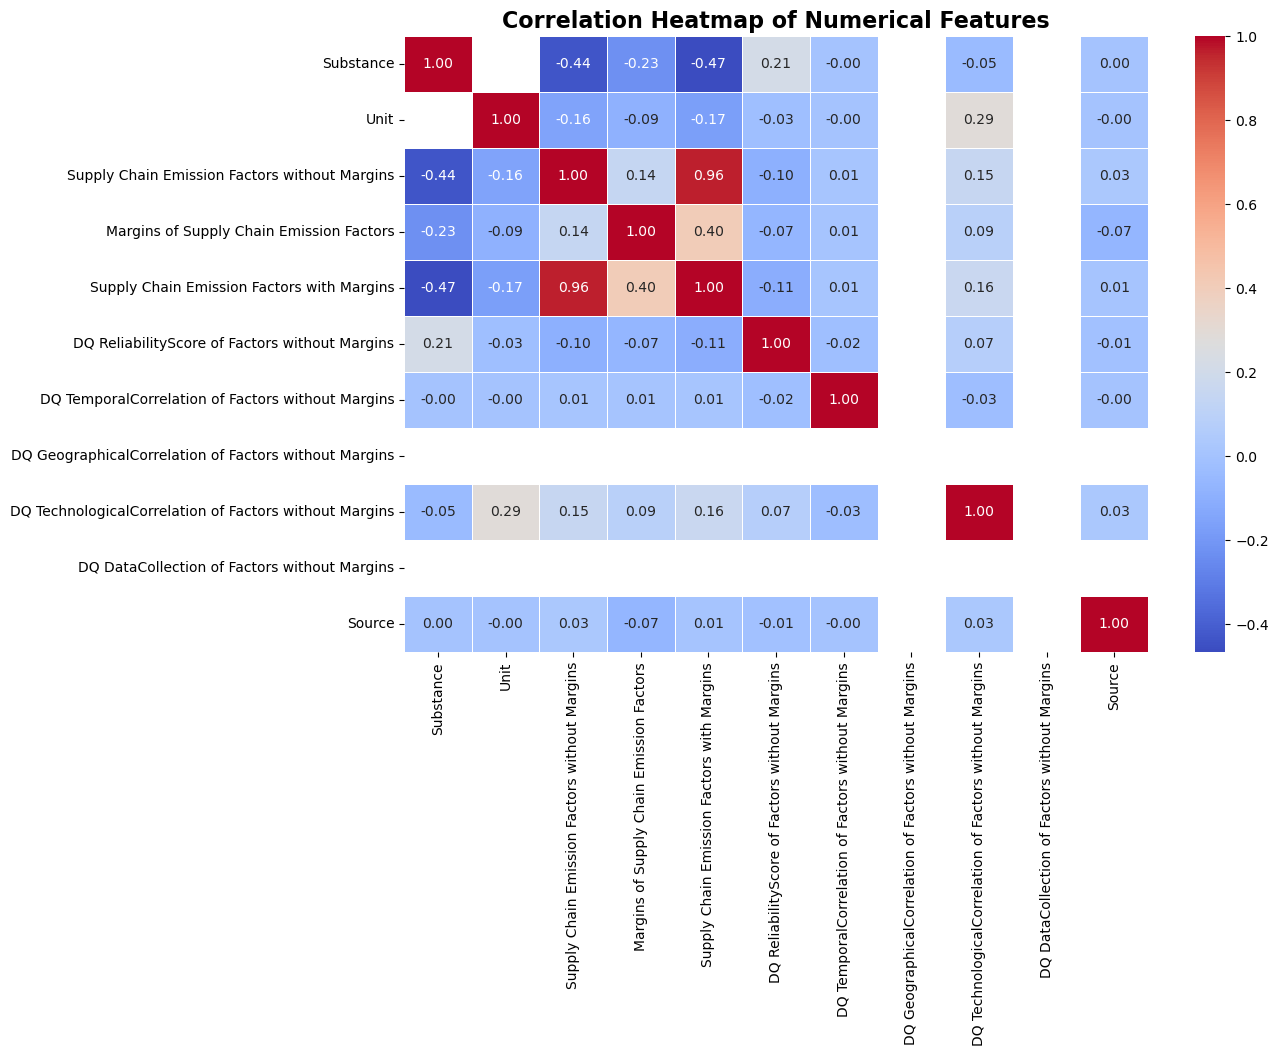

In [ ]:
#correlation heatmap
GHG.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(GHG.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.show()  # Display the heatmap


**Week -3**

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Substance,16569.0,1.000000,0.816521,0.0,0.0,1.000,2.000,2.000
Unit,22092.0,0.250000,0.433023,0.0,0.0,0.000,0.250,1.000
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Source,22092.0,0.500634,0.500011,0.0,0.0,1.000,1.000,1.000


**Normalize The Feature**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:
scaler = StandardScaler()  # Initialize the scaler
X_scaled = scaler.fit_transform(X)  # Fit and transform the features

In [ ]:
X_scaled[0].min(),X_scaled[0].max()  # Displaying the minimum and maximum values of the first row after scaling

(-1.224744871391589, 1.3849614361966767)

In [ ]:
from sklearn.impute import SimpleImputer # Importing SimpleImputer for handling missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
print(np.round(X_scaled.mean(axis=0)))  # Should be ~0
print(np.round(X_scaled.std(axis=0)))   # Should be ~1

[ 0. -0. -0. -0.  0. -0.  0. -0.  0. -0.]
[1. 1. 1. 1. 1. 1. 0. 1. 0. 1.]


In [ ]:
# Check if NaNs are present
print(np.isnan(X_scaled).sum())  # Should be 0 across all columns ideally

0


In [ ]:
np.round(X_scaled.mean()),np.round(X_scaled.std())  # Displaying the mean and standard deviation of the scaled features

(-0.0, 1.0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # Displaying the shapes of the training and testing sets

((17673, 10), (4419, 10), (17673,), (4419,))

**Training the model**

In [ ]:
Rf= RandomForestRegressor(n_estimators=100, random_state=42)  # Initializing the Random Forest Regressor
Rf.fit(X_train, y_train)  # Fitting the model to the training data

RandomForestRegressor(random_state=42)

**Prediction and Evaluation**

In [ ]:
Rf_y_pred=Rf.predict(X_test) # Making predictions on the test set
Rf_y_pred[:20]  # Displaying the first 20 predictions

array([2.92940000e-01, 1.00000000e-03, 1.21122793e-03, 1.16130018e-03,
       0.00000000e+00, 4.00000000e-03, 1.24555977e-04, 2.20009044e-03,
       2.00000000e-03, 3.94090000e-01, 0.00000000e+00, 1.40000000e-02,
       4.08395607e-03, 7.00000000e-03, 2.15970231e-03, 2.89160331e-04,
       1.02821706e-03, 3.16030000e-01, 9.00000000e-03, 0.00000000e+00])

In [ ]:
Rf_mse = mean_squared_error(y_test, Rf_y_pred)  # Calculating Mean Squared Error
print(f"Mean Squared Error: {Rf_mse:.2f}")  # Displaying the Mean Squared Error
Rf_r2 = r2_score(y_test, Rf_y_pred)  # Calculating R-squared score
print(f"R-squared: {Rf_r2:.2f}")  # Displaying the R-squared score
Rf_rmse = np.sqrt(Rf_mse)  # Calculating Root Mean Squared Error
print(f"Root Mean Squared Error: {Rf_rmse:.2f}")  #

Mean Squared Error: 0.00
R-squared: 1.00
Root Mean Squared Error: 0.01


In [ ]:
from sklearn.linear_model import LinearRegression
LR_Model = LinearRegression()  # Initializing the Linear Regression model
LR_Model.fit(X_train, y_train)  # Fitting the model to the training data
LR_y_pred = LR_Model.predict(X_test)  # Making predictions on the test set
LR_mse = mean_squared_error(y_test, LR_y_pred)  # Calculating Mean Squared Error
print(f"Mean Squared Error: {LR_mse:.2f}")
LR_r2 = r2_score(y_test, LR_y_pred)  # Calculating R-squared score
print(f"R-squared: {LR_r2:.2f}")  # Displaying the R-squared score for Linear Regression
LR_rmse = np.sqrt(LR_mse)  # Calculating Root Mean Squared Error
print(f"Root Mean Squared Error: {LR_rmse:.2f}")  # Displaying the Root Mean Squared Error for Linear Regression

Mean Squared Error: 0.00
R-squared: 1.00
Root Mean Squared Error: 0.00


**Hyperparameter tuning**

In [ ]:
#hyperparameter tuning for Random Forest Regressor using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
grid_search = GridSearchCV(estimator=Rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)  # Initializing GridSearchCV
grid_search.fit(X_train, y_train)  # Fitting the grid search to the training data

#Best Model From Grid Search
best_model = grid_search.best_estimator_  # Getting the best model from the grid search
print("Best Parameters:", grid_search.best_params_)  # Displaying the best parameters found by GridSearchCV
print(f"Best Score: {grid_search.best_score_:.2f}")  # Displaying the best score from the grid search

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 1.00


**Use best Parameter**

In [ ]:
#use best Parameter to make predictions
y_pred_best = best_model.predict(X_test)  # Making predictions using the best model
Hp_mse = mean_squared_error(y_test, y_pred_best)  # Calculating Mean Squared Error for the best model
Hp_mse=np.sqrt(Hp_mse)  # Taking the square root of the Mean Squared Error
print(f"Mean Squared Error with Best Parameters: {Hp_mse:.2f}")  # Displaying the Mean Squared Error for the best model
Hp_r2 = r2_score(y_test, y_pred_best)  # Calculating R-squared score for the best model
print(f"R-squared with Best Parameters: {Hp_r2:.2f}")
Hp_rmse = np.sqrt(Hp_mse)  # Calculating Root Mean Squared Error for the best model
print(f"Root Mean Squared Error with Best Parameters: {Hp_rmse:.2f}")  # Displaying the Root Mean Squared Error for the best model


Mean Squared Error with Best Parameters: 0.01
R-squared with Best Parameters: 1.00
Root Mean Squared Error with Best Parameters: 0.07


**Comparative Study and selecting the BEst Model**

In [ ]:
#create a comaprative dataframe for all Models
results = {
    'Model': ['Random Forest', 'Linear Regression', 'Best Random Forest(Tuned)'],
    'Mean Squared Error': [Rf_mse, LR_mse, Hp_mse],
    'R-squared': [Rf_r2, LR_r2, Hp_r2],
    'Rmse': [Rf_rmse, LR_rmse, Hp_rmse]

}

# Create a Dataframe to compare the results of different models
results_df = pd.DataFrame(results)  # Creating a DataFrame from the results dictionary
results_df.set_index('Model', inplace=True)  # Setting the 'Model' column as
print(results_df)  # Displaying the comparative results DataFrame

                           Mean Squared Error  R-squared      Rmse
Model                                                             
Random Forest                    3.597445e-05   0.999360  0.005998
Linear Regression                7.881378e-08   0.999999  0.000281
Best Random Forest(Tuned)        5.481082e-03   0.999465  0.074034


**Save the Model and Ecoders**

In [ ]:
!mkdir models

In [ ]:
# Create a directory to save the model if its doesnt't exist
import os
if not os.path.exists('Model'):
    os.makedirs('Model')
joblib.dump(best_model, 'Model/LR_model.pkl')  # Saving the best model to a file
joblib.dump(scaler, 'Model/scaler.pkl')  # Saving the scaler to a file

['Model/scaler.pkl']

In [ ]:
X.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')